

Tying to identify popular genres and trends.   Analyze game data to understand what features are needed for top selling games.  


This dataset contains a list of video games taken from [wikipedia](https://en.wikipedia.org/w/index.php?title=List_of_best-selling_video_games&diff=prev&oldid=1184117073).

[The Internet Game Database (IGDB)](https://api-docs.igdb.com/#game) Fields include:


| Field                   | Description                                                        |
|-------------------------|--------------------------------------------------------------------|
| age_ratings             | The PEGI rating                                                   |
| category                | The category of this game                                          |
| first_release_date      | The first release date for this game                               |
| game_localizations      | Supported game localizations for this game. A region can have at most one game localization for a given game |
| game_modes              | Modes of gameplay                                                 |
| genres                  | Genres of the game                                                 |
| involved_companies      | Companies who developed this game                                  |
| multiplayer_modes       | Multiplayer modes for this game                                    |
| platforms               | Platforms this game was released on                                |
| player_perspectives     | The main perspective of the player                                 |
| release_dates           | Release dates of this game                                         |
| slug                    | A url-safe, unique, lower-case version of the name                 |
| summary                 | A description of the game                                          |
| themes                  | Themes of the game                                                 |
| url                     | The website address (URL) of the item

## Actual Task Definition/Research Question
In the competitive and high-stakes field of video game development, where AAA games require substantial investments of millions of dollars and years of effort, the challenge lies in identifying key factors that serve as reliable indicators for the success of a best-selling video game. The objective is to conduct an analysis that can provide insights into these crucial factors, offering a strategic perspective to game developers and stakeholders. The input for the analysis is comprehensive data on various attributes of video games, while the desired output is a set of identified indicators that significantly contribute to a game's commercial success

I attempted Wikipedia module for data retrieval, but fount it insufficient for research needs.

In [1]:
import wikipedia as wiki

print(wiki.search('best video games'))
best_selling = wiki.page('List of best-selling video games')
print(best_selling.url)
print(best_selling.categories)
print(best_selling.content)

['List of video games considered the best', 'List of best-selling video games', 'List of Game of the Year awards', 'Lists of best-selling video games by platform', 'List of best-selling GameCube video games', '2007 in video games', '2000 in video games', '1997 in video games', 'List of best-selling Nintendo Switch video games', '2010 in video games']
https://en.wikipedia.org/wiki/List_of_best-selling_video_games
['Articles with short description', 'Dynamic lists', 'Lists of best-selling video games', 'Short description is different from Wikidata', 'Use mdy dates from November 2020', 'Wikipedia indefinitely move-protected pages', 'Wikipedia indefinitely semi-protected pages']
This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is Minecraft, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, selling more than 300 million copies across all platforms. Grand Theft Au

Since this module doesn't even see the table I need, IExperimented with the wikipediaapi module, achieved more feedback, but still faced challenges accessing required data without resorting to web scraping.

In [3]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia('info (zhiwt01@gmail.com.com)', 'en')
page_py = wiki_wiki.page('List_of_best-selling_video_games')

def print_categories(page):
        categories = page.categories
        for title in sorted(categories.keys()):
            print("%s: %s" % (title, categories[title]))

print("Categories")
print_categories(page_py)
print(page_py.text)

wiki_text = wikipediaapi.Wikipedia(
    'info (testing@gmail.com)', 'en', extract_format=wikipediaapi.ExtractFormat.WIKI)
text = wiki_text.page('List_of_best-selling_video_games')
print(text.text)

wiki_html = wikipediaapi.Wikipedia(
    'info (zhiwt01@gmail.com.com)', 'en', extract_format=wikipediaapi.ExtractFormat.HTML)
html = wiki_html.page('List_of_best-selling_video_games')
print(html.text)

Categories
Category:Articles with short description: Category:Articles with short description (id: ??, ns: 14)
Category:Dynamic lists: Category:Dynamic lists (id: ??, ns: 14)
Category:Lists of best-selling video games: Category:Lists of best-selling video games (id: ??, ns: 14)
Category:Short description is different from Wikidata: Category:Short description is different from Wikidata (id: ??, ns: 14)
Category:Use mdy dates from November 2020: Category:Use mdy dates from November 2020 (id: ??, ns: 14)
Category:Wikipedia indefinitely move-protected pages: Category:Wikipedia indefinitely move-protected pages (id: ??, ns: 14)
Category:Wikipedia indefinitely semi-protected pages: Category:Wikipedia indefinitely semi-protected pages (id: ??, ns: 14)
This is a list of video games that have sold the highest number of software units worldwide. The best-selling video game to date is Minecraft, a sandbox game released by Mojang in May 2009 for a wide range of PC, mobile and console platforms, se

It turns out that it gave additional features, but it still didnt see the table. I came close to resorting to web scraping. However, I came across an article mentioning the ability to load data directly from pandas. I gave it a try, and it worked.

In [4]:
import pandas as pd
my_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_video_games') 

for x in my_table:
    print(x.head())

                                                   0
0                                        Video games
1  Platforms Arcade video game Console game Game ...
2  Genres Action Beat 'em up Hack and slash Fight...
3  Lists Arcade games highest-grossing Best-selli...
4  Development Game AI Game design Video game des...
                 Title      Sales            Series     Platform(s)  \
0            Minecraft  300000000         Minecraft  Multi-platform   
1   Grand Theft Auto V  190000000  Grand Theft Auto  Multi-platform   
2          Tetris (EA)  100000000            Tetris  Multi-platform   
3           Wii Sports   82900000               Wii             Wii   
4  PUBG: Battlegrounds   75000000     PUBG Universe  Multi-platform   

   Initial release date   Developer(s)[b]  Publisher(s)[b] Ref.  
0  November 18, 2011[c]    Mojang Studios   Mojang Studios  [4]  
1    September 17, 2013    Rockstar North   Rockstar Games  [5]  
2    September 12, 2006         EA Mobile  Electronic Art

Pandas proved highly effective for the task. I had to make sure to get the right table.

In [5]:
import matplotlib.pyplot as plt

titles = my_table[1].convert_dtypes()

titles.head()

,Title,Sales,Series,Platform(s),Initial release date,Developer(s)[b],Publisher(s)[b],Ref.
0,Minecraft,300000000,Minecraft,Multi-platform,"November 18, 2011[c]",Mojang Studios,Mojang Studios,[4]
1,Grand Theft Auto V,190000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games,[5]
2,Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts,[6]
3,Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo,[7]
4,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,Krafton,[8]


Conducted data verification, checked for missing values and replaced them with '0' during the preliminary data cleaning process. The NaN values indicate that the video game is an original title and not part of a series. Therefore, replacing them with 0 is a reasonable approach without causing any harm.

In [6]:
print(titles.dtypes)
print(titles.isna().sum())

rows_with_nan = titles[titles.isna().any(axis=1)]
print(rows_with_nan)

titles = titles.fillna('0')
print(titles.isna().sum())

Title                   string[python]
Sales                            Int64
Series                  string[python]
Platform(s)             string[python]
Initial release date    string[python]
Developer(s)[b]         string[python]
Publisher(s)[b]         string[python]
Ref.                    string[python]
dtype: object
Title                   0
Sales                   0
Series                  5
Platform(s)             0
Initial release date    0
Developer(s)[b]         0
Publisher(s)[b]         0
Ref.                    0
dtype: int64
                 Title     Sales Series     Platform(s) Initial release date  \
12            Terraria  44500000   <NA>  Multi-platform         May 16, 2011   
16    Human: Fall Flat  40000000   <NA>  Multi-platform        July 22, 2016   
26           Duck Hunt  28300000   <NA>             NES       April 21, 1984   
44  Kinect Adventures!  24000000   <NA>        Xbox 360     November 4, 2010   
45          Nintendogs  23960000   <NA>     Nintendo 

I believed that utilizing a visualization would be a more effective means of conveying the sales data and comparing the performance of the games against each other.

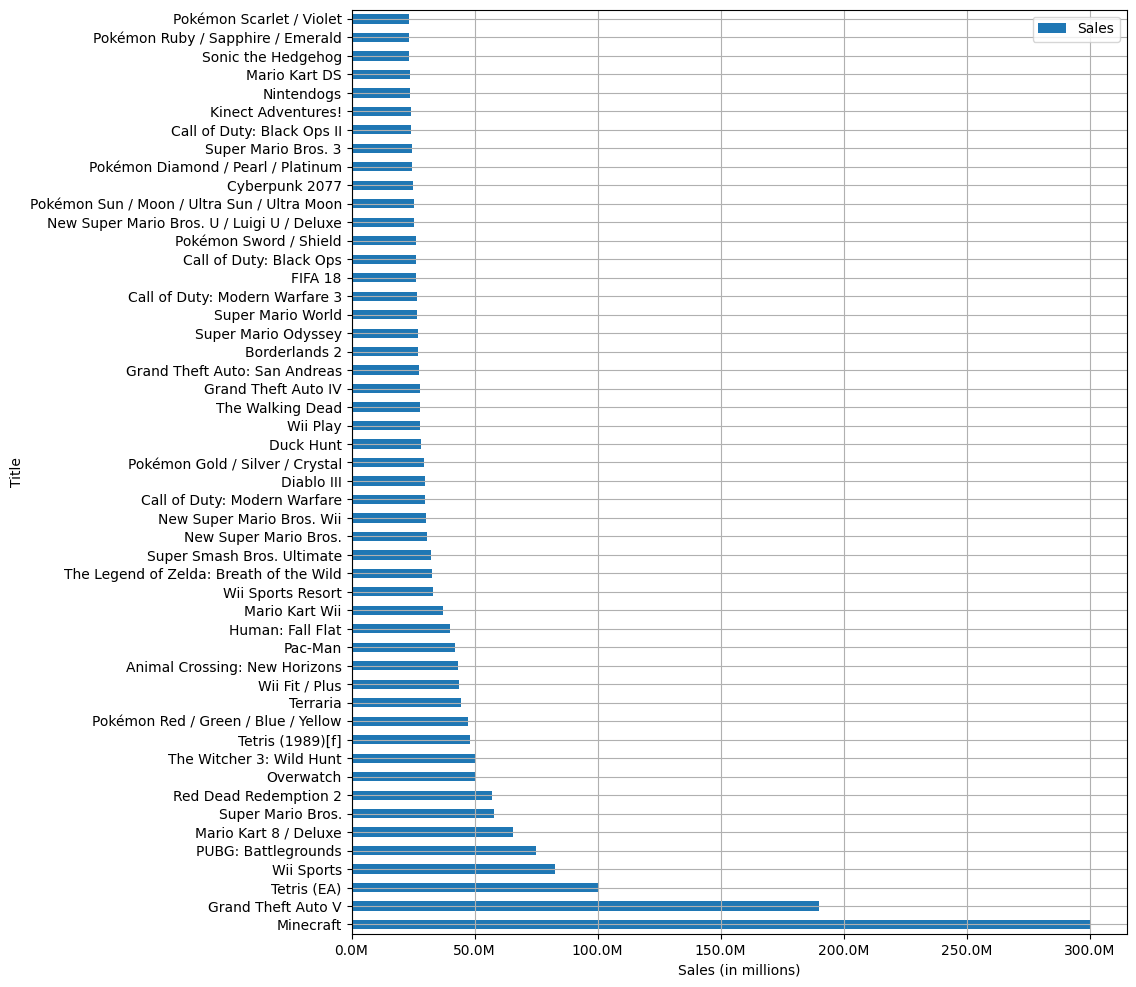

In [7]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'
df = titles
ax = titles.plot(x='Title',y='Sales', 
         kind="barh", grid=True,  figsize=(10,12))
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Sales (in millions)')
plt.show()

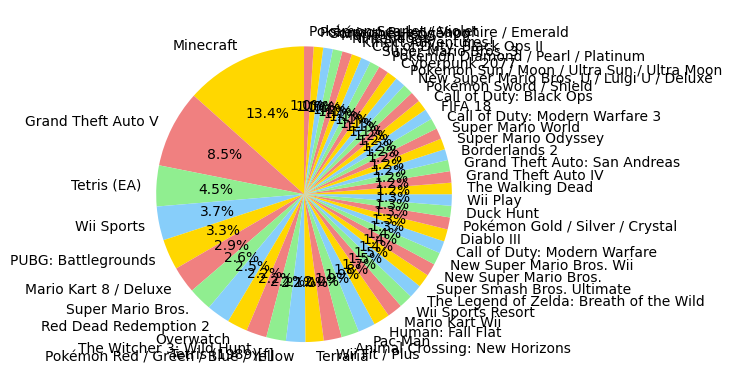

In [8]:
plt.pie(titles['Sales'], labels=titles['Title'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.show()

Realized that just showing all of the games is too much info. Limited games with sales exceeding 50 million for comparative analysis against the overall sales aggregate.

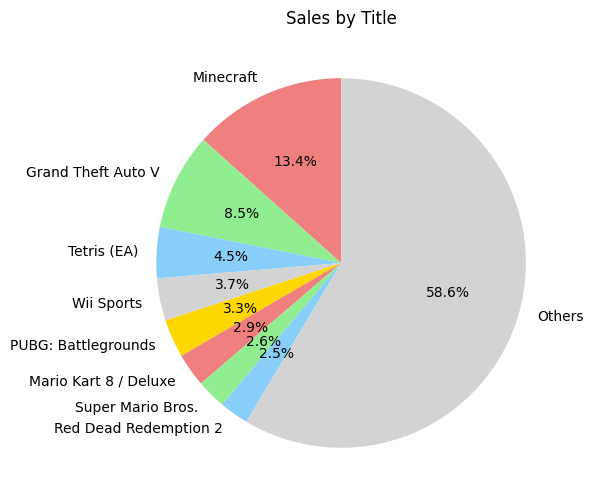

In [9]:
threshold = 50000000

titles_above_threshold = titles[titles['Sales'] > threshold]
titles_others = titles[titles['Sales'] <= threshold]
sales_others_total = titles_others['Sales'].sum()

titles_others = pd.DataFrame({'Title': ['Others'], 'Sales': [sales_others_total]})

pie_titles = pd.concat([titles_above_threshold, titles_others])

plt.figure(figsize=(6, 6))
plt.pie(pie_titles['Sales'], labels= pie_titles['Title'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightgray', 'gold'])
plt.title('Sales by Title')

plt.show()

Used the Internet Game Database (IGDB) website and used their API to access their data. Obtained access by creating an account through Twitch. Utilized their Python API wrapper. I successfully executed a test request in Python, having previously tested API calls with Postman. I chose to no call all of that data for the game because things screen shots and box art wouldn't help this analysis.

In [10]:
from config import headers
from igdb.wrapper import IGDBWrapper

id, key = headers.values()
wrapper = IGDBWrapper(client_id=id, auth_token=key)

byte_array = wrapper.api_request(
    endpoint='games',
    query='fields id, age_ratings, alternative_names, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; where name ="Minecraft";')

print(byte_array)

b'[\n  {\n    "id": 121,\n    "age_ratings": [\n      31660,\n      46780,\n      47365,\n      47366,\n      47368,\n      47370,\n      109464\n    ],\n    "alternative_names": [\n      30487,\n      51648,\n      53531,\n      100969,\n      123546\n    ],\n    "category": 0,\n    "game_modes": [\n      1,\n      2,\n      3,\n      4,\n      5\n    ],\n    "genres": [\n      13,\n      31\n    ],\n    "involved_companies": [\n      102771\n    ],\n    "multiplayer_modes": [\n      11137,\n      11138,\n      11139\n    ],\n    "name": "Minecraft",\n    "platforms": [\n      3,\n      6,\n      14\n    ],\n    "player_perspectives": [\n      1,\n      2,\n      7\n    ],\n    "slug": "minecraft",\n    "summary": "Minecraft focuses on allowing the player to explore, interact with, and modify a dynamically-generated map made of one-cubic-meter-sized blocks. In addition to blocks, the environment features plants, mobs, and items. Some activities in the game include mining for ore, figh

In [11]:
import json
import pandas as pd

df = json.loads(byte_array)
df= pd.DataFrame(df)
df.head()

,id,age_ratings,alternative_names,category,game_modes,genres,involved_companies,multiplayer_modes,name,platforms,player_perspectives,slug,summary,themes,url,game_localizations
0,121,"[31660, 46780, 47365, 47366, 47368, 47370, 109...","[30487, 51648, 53531, 100969, 123546]",0,"[1, 2, 3, 4, 5]","[13, 31]",[102771],"[11137, 11138, 11139]",Minecraft,"[3, 6, 14]","[1, 2, 7]",minecraft,Minecraft focuses on allowing the player to ex...,"[17, 21, 33, 35, 38]",https://www.igdb.com/games/minecraft,"[1535, 1590]"
1,135400,"[33580, 47376, 47377, 47378, 47379, 47380, 47381]",[141089],11,"[1, 2, 3, 4, 5]","[13, 31]",[189609],"[11131, 11132, 11133, 11134, 11135, 11136]",Minecraft,"[6, 34, 39, 48, 49, 130, 132]","[1, 2, 7]",minecraft--1,Minecraft focuses on allowing the player to ex...,"[1, 17, 21, 33, 35, 38, 41]",https://www.igdb.com/games/minecraft--1,NaN


In [12]:
title = 'Minecraft'
payload = f'fields id, first_release_date, release_dates, age_ratings, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; where name ="{title}";limit 30;'
byte_array = wrapper.api_request(endpoint='games',query=payload)
test = json.loads(byte_array)
test

[{'id': 121,
  'age_ratings': [31660, 46780, 47365, 47366, 47368, 47370, 109464],
  'category': 0,
  'first_release_date': 1321574400,
  'game_modes': [1, 2, 3, 4, 5],
  'genres': [13, 31],
  'involved_companies': [102771],
  'multiplayer_modes': [11137, 11138, 11139],
  'name': 'Minecraft',
  'platforms': [3, 6, 14],
  'player_perspectives': [1, 2, 7],
  'release_dates': [482989,
   482990,
   482991,
   482992,
   482993,
   482994,
   482995,
   482996,
   482997],
  'slug': 'minecraft',
  'summary': "Minecraft focuses on allowing the player to explore, interact with, and modify a dynamically-generated map made of one-cubic-meter-sized blocks. In addition to blocks, the environment features plants, mobs, and items. Some activities in the game include mining for ore, fighting hostile mobs, and crafting new blocks and tools by gathering various resources found in the game. The game's open-ended model allows players to create structures, creations, and artwork on various multiplayer se

I kept getting receiving a persistent 400 response errors despite passing the request through the <https://apicalypse.io/syntax/> validator and postman. 

Attempted to fetch all game data at once (query = filtered_entries + entries_with_slash) but continued to face 400 errors. Opted for two separate queries to troubleshoot. 

The issue persisted and then I identified the problem. The presence of an accent mark on the letter 'e' in Pokémon, which bypassed syntax checks and Postman app but caused complications with the python API wrapper and the request module. I resolved it by using the unidecode library.

In [14]:
from unidecode import unidecode

clean_titles = [title.split(' (')[0] for title in titles['Title']]
filtered_entries = []
entries_with_slash = []

for entry in clean_titles:
    if '/' not in entry:
        filtered_entries.append(unidecode(entry.replace('.','')))
    else:
        parts = entry.split(' / ')
        common_part = unidecode(parts[0].replace('.',''))
        entries_with_slash.append(common_part)
        parts.pop(0)
        entries_with_slash.extend([common_part + ' ' + unidecode(part) for part in parts])

print("Filtered Entries (Without '/'): ", filtered_entries)
print("Entries with '/': ", entries_with_slash)
print(len(clean_titles), len(filtered_entries), len(entries_with_slash))

Filtered Entries (Without '/'):  ['Minecraft', 'Grand Theft Auto V', 'Tetris', 'Wii Sports', 'PUBG: Battlegrounds', 'Super Mario Bros', 'Red Dead Redemption 2', 'Overwatch', 'The Witcher 3: Wild Hunt', 'Tetris', 'Terraria', 'Animal Crossing: New Horizons', 'Pac-Man', 'Human: Fall Flat', 'Mario Kart Wii', 'Wii Sports Resort', 'The Legend of Zelda: Breath of the Wild', 'Super Smash Bros Ultimate', 'New Super Mario Bros', 'New Super Mario Bros Wii', 'Call of Duty: Modern Warfare', 'Diablo III', 'Duck Hunt', 'Wii Play', 'The Walking Dead', 'Grand Theft Auto IV', 'Grand Theft Auto: San Andreas', 'Borderlands 2', 'Super Mario Odyssey', 'Super Mario World', 'Call of Duty: Modern Warfare 3', 'FIFA 18', 'Call of Duty: Black Ops', 'Cyberpunk 2077', 'Super Mario Bros 3', 'Call of Duty: Black Ops II', 'Kinect Adventures!', 'Nintendogs', 'Mario Kart DS', 'Sonic the Hedgehog']
Entries with '/':  ['Mario Kart 8', 'Mario Kart 8 Deluxe', 'Pokemon Red', 'Pokemon Red Green', 'Pokemon Red Blue', 'Pokemon 

In [15]:
q = filtered_entries + entries_with_slash
payload = f'fields id, first_release_date, release_dates, age_ratings, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; where name = ({','.join(f'"{item}"' for item in q)}); limit 500;'
response = wrapper.api_request(endpoint='games',query=payload)
print(response)

df = pd.DataFrame(json.loads(response))
print(df.head())

b'[\n  {\n    "id": 274253,\n    "category": 0,\n    "first_release_date": 1041292800,\n    "game_modes": [\n      1\n    ],\n    "genres": [\n      33\n    ],\n    "involved_companies": [\n      236733\n    ],\n    "name": "Pac-Man",\n    "platforms": [\n      82\n    ],\n    "player_perspectives": [\n      3\n    ],\n    "release_dates": [\n      531758\n    ],\n    "slug": "pac-man--36",\n    "summary": "A fan made port of the original Namco game, a staple of 2000s-era gaming portals.",\n    "url": "https://www.igdb.com/games/pac-man--36"\n  },\n  {\n    "id": 213921,\n    "category": 11,\n    "first_release_date": 404956800,\n    "game_modes": [\n      1\n    ],\n    "genres": [\n      33\n    ],\n    "involved_companies": [\n      237913\n    ],\n    "name": "Pac-Man",\n    "platforms": [\n      66\n    ],\n    "player_perspectives": [\n      3\n    ],\n    "release_dates": [\n      381979\n    ],\n    "slug": "pac-man--16",\n    "summary": "The Atari 5200 port of Pac-Man.\\n\\nOn

"Ran the initial query, noticed some games missing. Had to query with search using instead of just relying on names, which brought in more games to the dataset."

In [16]:
import time

def missing_item(comp, lst):
    return [title for title in comp if title not in lst]

missing_names= missing_item(q,df['name'].tolist())
print(missing_names)

requests_per_second = 4
max_open_requests = 8

responses = []

for x in missing_names:
    payload = f'fields id,first_release_date, release_dates, age_ratings, category, game_modes, genres, involved_companies, multiplayer_modes, name, platforms, player_perspectives, slug, summary, themes, url, game_localizations; search "{x}"; limit 500;'
    response = wrapper.api_request(endpoint='games',query=payload)
    m=pd.Series(json.loads(response))
    responses.append(m)

    time.sleep(1 / requests_per_second)
    
for x in responses:
    for i in x:
        df[len(df)]=i
        print(i['name'])

['Super Mario Bros', 'Super Smash Bros Ultimate', 'New Super Mario Bros', 'New Super Mario Bros Wii', 'The Walking Dead', 'Super Mario Bros 3', 'Kinect Adventures!', 'Nintendogs', 'Pokemon Red', 'Pokemon Red Green', 'Pokemon Red Blue', 'Pokemon Red Yellow', 'Pokemon Gold', 'Pokemon Gold Silver', 'Pokemon Gold Crystal', 'Pokemon Sword', 'Pokemon Sword Shield', 'New Super Mario Bros U', 'New Super Mario Bros U Luigi U', 'New Super Mario Bros U Deluxe', 'Pokemon Sun', 'Pokemon Sun Moon', 'Pokemon Sun Ultra Sun', 'Pokemon Sun Ultra Moon', 'Pokemon Diamond', 'Pokemon Diamond Pearl', 'Pokemon Diamond Platinum', 'Pokemon Ruby', 'Pokemon Ruby Sapphire', 'Pokemon Ruby Emerald', 'Pokemon Scarlet', 'Pokemon Scarlet Violet']
Super Mario Bros.
The Super Mario Bros. Super Show! 64
Super Mario Bros.: Two Players Hack
Super Mario Bros.: The Lost Levels
Classic NES Series: Super Mario Bros.
Vs. Super Mario Bros.
Super Mario Bros. R
Super Mario Bros.: The Lost Levels
Super Mario Bros. Z: The Game
Super 

In [17]:
df.drop(columns=130, inplace=True)
df= df[['id','name', 'slug', 'first_release_date', 'release_dates', 'summary', 'genres','category',
        'themes','platforms', 'player_perspectives', 'multiplayer_modes', 'involved_companies',
        'game_modes','age_ratings','url', 'game_localizations']]
df['first_release_date'] = pd.to_datetime(df['first_release_date'], unit='s')
df['first_release_date'] = df['first_release_date'].dt.strftime('%B %d, %Y')
df.head()

,id,name,slug,first_release_date,release_dates,summary,genres,category,themes,platforms,player_perspectives,multiplayer_modes,involved_companies,game_modes,age_ratings,url,game_localizations
0,274253,Pac-Man,pac-man--36,"December 31, 2002",[531758],"A fan made port of the original Namco game, a ...",[33],0,NaN,[82],[3],NaN,[236733],[1],NaN,https://www.igdb.com/games/pac-man--36,NaN
1,213921,Pac-Man,pac-man--16,"November 01, 1982",[381979],The Atari 5200 port of Pac-Man.\n\nOne of the ...,[33],11,[17],[66],[3],NaN,[237913],[1],NaN,https://www.igdb.com/games/pac-man--16,NaN
2,239064,Grand Theft Auto V,grand-theft-auto-v--2,"June 15, 2022","[454273, 454277, 454532, 454533]",This bundle contains the original version of G...,NaN,3,NaN,"[48, 49, 167, 169]",NaN,"[24400, 24401]",NaN,"[1, 2, 3]","[145893, 151443]",https://www.igdb.com/games/grand-theft-auto-v--2,NaN
3,197617,Sonic the Hedgehog,sonic-the-hedgehog--16,"December 20, 2005","[353082, 353083]",The port of Sonic the Hedgehog for mobile phon...,[8],11,[1],[55],[4],NaN,"[167673, 167674]",[1],NaN,https://www.igdb.com/games/sonic-the-hedgehog--16,NaN
4,198580,Sonic the Hedgehog,sonic-the-hedgehog--9,"December 31, 1991","[382183, 437639]",Sonic the Hedgehog is an LCD game created by T...,[33],11,[1],[411],[4],NaN,"[184075, 199840]",[1],NaN,https://www.igdb.com/games/sonic-the-hedgehog--9,NaN


After retrieving the game data, I noticed that many values were encoded using internal IDs, which were not immediately comprehensible. Consequently, I had to query the database to obtain the corresponding codes and subsequently map them back into the dataframe.

In [18]:
dev = titles['Developer(s)[b]'].unique()
pub = titles['Publisher(s)[b]'].unique()
print(dev) 

<StringArray>
[                      'Mojang Studios',
                       'Rockstar North',
                            'EA Mobile',
                         'Nintendo EAD',
                     'PUBG Corporation',
 'Nintendo EAD / Nintendo EPD (Deluxe)',
                        'Nintendo R&D4',
                     'Rockstar Studios',
               'Blizzard Entertainment',
                       'CD Projekt Red',
                        'Nintendo R&D1',
                           'Game Freak',
                             'Re-Logic',
                         'Nintendo EPD',
                                'Namco',
                      'No Brakes Games',
     'Bandai Namco Studios / Sora Ltd.',
                        'Infinity Ward',
                       'Telltale Games',
                     'Gearbox Software',
         'Infinity Ward / Sledgehammer',
                         'EA Vancouver',
                             'Treyarch',
                  'Good Science Studio',
  

In [19]:
from unidecode import unidecode

def clean_list(lst):
    result=[]
    for entry in lst:
        if '/' not in entry:
            result.append(unidecode(entry))
        else:
            parts = entry.split(' / ')
            result.extend([ unidecode(part) for part in parts])
    return result

dev_clean = clean_list(dev)
pub_clean = clean_list(pub)
dev_pub_list = set(pub_clean + dev_clean)
print(dev_pub_list)

payload = f'fields id, name; where name = ({','.join(f'"{item}"' for item in dev_pub_list)}); limit 500;'
response = wrapper.api_request(endpoint='companies',query=payload)
data_list = json.loads(response)
dev_pub_code = {str(entry['name']):entry['id'] for entry in data_list}
print(dev_pub_code)

{'Gearbox Software', 'EA Sports', 'Sora Ltd.', 'Bandai Namco Studios', 'Nintendo R&D4', 'Treyarch', 'Infinity Ward', 'PUBG Corporation', 'The Pokemon Company', 'CD Projekt', '505 Games', 'Rockstar Games', 'Rockstar Studios', 'Nintendo', 'EA Mobile', 'Sonic Team', 'Good Science Studio', 'Electronic Arts', 'EA Vancouver', 'Curve Digital', 'Re-Logic', 'Sledgehammer', 'Nintendo EAD', 'Nintendo EPD', 'Nintendo R&D1', 'Activision', '2K Games', 'Krafton', 'Xbox Game Studios', 'Nintendo EPD (Deluxe)', 'Telltale Games', 'Sega', 'CD Projekt Red', 'Mojang Studios', 'Blizzard Entertainment', 'Namco', 'Rockstar North', 'No Brakes Games', 'Game Freak'}
{'No Brakes Games': 10474, 'Good Science Studio': 1253, 'CD Projekt': 4291, 'Nintendo R&D4': 32471, 'Nintendo EPD': 7902, 'EA Vancouver': 27222, 'EA Mobile': 712, 'Curve Digital': 5048, 'Infinity Ward': 438, 'Krafton': 41542, 'Re-Logic': 910, 'Gearbox Software': 148, 'Nintendo EAD': 421, 'Telltale Games': 294, 'Game Freak': 1617, '2K Games': 8, 'Xbox 

Some names are missing, but it's acceptable since they have alternative names like "Nintendo" representing both "The Pokemon Company" and "Nintendo EPD (Deluxe)"

In [20]:
missing_dev = missing_item(dev_pub_list,dev_pub_code)
print(missing_dev)

['PUBG Corporation', 'The Pokemon Company', 'Rockstar Studios', 'Sledgehammer', 'Nintendo EPD (Deluxe)', 'CD Projekt Red']


In [21]:
def extract_unique(lst):
    result = lst.dropna()
    result = result.to_list()
    return list(set([item for sublist in result for item in sublist]))

def send_api(place, payload):
    response = wrapper.api_request(endpoint=place,query=payload)
    return json.loads(response)

In [22]:
age_ratings_list = extract_unique(df['age_ratings'])
print(age_ratings_list)

[103936, 32771, 12298, 56846, 56847, 47120, 47121, 91665, 68115, 68111, 99350, 50715, 96285, 83487, 12328, 12329, 79914, 47148, 109103, 47151, 109107, 117300, 56885, 31285, 145975, 96819, 22073, 91197, 47171, 31815, 73805, 56914, 56915, 50775, 28761, 95836, 96, 31849, 44655, 93296, 57460, 109181, 109182, 109183, 5760, 14980, 14981, 103556, 90759, 98452, 98453, 98454, 109210, 92317, 32932, 88746, 91819, 12972, 62638, 90806, 12983, 12984, 32441, 46780, 189, 190, 703, 192, 10942, 194, 195, 111306, 126161, 10965, 32981, 88793, 88794, 97499, 91866, 36578, 46308, 1257, 64750, 48879, 111349, 126200, 126201, 67324, 109310, 78591, 96511, 111359, 136962, 91907, 47365, 47366, 27911, 47368, 96519, 47370, 47886, 47887, 47376, 47377, 47378, 47379, 47380, 47381, 124694, 47888, 47889, 47890, 47891, 47892, 126236, 126237, 47893, 47894, 47895, 47393, 32033, 32034, 108836, 93478, 93481, 147754, 47915, 152364, 33580, 67886, 1325, 67374, 47916, 47917, 47918, 47919, 47920, 27446, 48954, 78138, 78139, 44861,

In [23]:
payload = f'fields id, category, rating; where id = ({','.join(f'{item}' for item in age_ratings_list)}); limit 500;'
age_ratings_code = pd.DataFrame(send_api('age_ratings',payload))
print(age_ratings_code.head())

payload = f'fields id, category, rating; where id = ({','.join(f'{item}' for item in age_ratings_list)}); limit 500;'
age_ratings_code = pd.DataFrame(send_api('age_ratings',payload))
print(age_ratings_code.head())

    id  category  rating
0   96         1      11
1  189         1       8
2  190         1       8
3  192         1       8
4  194         1       8
    id  category  rating
0   96         1      11
1  189         1       8
2  190         1       8
3  192         1       8
4  194         1       8


Highly frustrating experience as the API lacked a specific endpoint for age category or rating. Consequently, I resorted to a manual approach by copying and pasting the relevant table from their API page.

In [24]:

game_cat_code = {
    'main_game': 0,
    'dlc_addon': 1,
    'expansion': 2,
    'bundle': 3,
    'standalone_expansion': 4,
    'mod': 5,
    'episode': 6,
    'season': 7,
    'remake': 8,
    'remaster': 9,
    'expanded_game': 10,
    'port': 11,
    'fork': 12,
    'pack': 13,
    'update': 14
}
game_cat_code = {v: k for k, v in game_cat_code.items()}
df['category']= df['category'].map(game_cat_code)


category_dict = {
    'ESRB': 1,
    'PEGI': 2,
    'CERO': 3,
    'USK': 4,
    'GRAC': 5,
    'CLASS_IND': 6,
    'ACB': 7
}
category_dict = {v: k for k, v in category_dict.items()}

rating_dict = {
    'Three': 1,
    'Seven': 2,
    'Twelve': 3,
    'Sixteen': 4,
    'Eighteen': 5,
    'RP': 6,
    'EC': 7,
    'E': 8,
    'E10': 9,
    'T': 10,
    'M': 11,
    'AO': 12,
    'CERO_A': 13,
    'CERO_B': 14,
    'CERO_C': 15,
    'CERO_D': 16,
    'CERO_Z': 17,
    'USK_0': 18,
    'USK_6': 19,
    'USK_12': 20,
    'USK_16': 21,
    'USK_18': 22,
    'GRAC_ALL': 23,
    'GRAC_Twelve': 24,
    'GRAC_Fifteen': 25,
    'GRAC_Eighteen': 26,
    'GRAC_TESTING': 27,
    'CLASS_IND_L': 28,
    'CLASS_IND_Ten': 29,
    'CLASS_IND_Twelve': 30,
    'CLASS_IND_Fourteen': 31,
    'CLASS_IND_Sixteen': 32,
    'CLASS_IND_Eighteen': 33,
    'ACB_G': 34,
    'ACB_PG': 35,
    'ACB_M': 36,
    'ACB_MA15': 37,
    'ACB_R18': 38,
    'ACB_RC': 39
}

rating_dict = {v: k for k, v in rating_dict.items()}
age_ratings_code['category'] = age_ratings_code['category'].map(category_dict)
age_ratings_code['rating'] = age_ratings_code['rating'].map(rating_dict)
age_ratings_code['combined'] = age_ratings_code['category'].astype(str) +' '+ age_ratings_code['rating'].astype(str)
age_ratings_code = age_ratings_code[['id','combined']]
age_ratings_code = age_ratings_code.to_dict('index')
age_ratings_code = {obj['id']: obj['combined'] for obj in age_ratings_code.values()}

game_mode_list = extract_unique(df['game_modes'])
payload = f'fields id, name; where id = ({','.join(f'{item}' for item in game_mode_list)}); limit 500;'
game_mode_code = send_api('game_modes',payload)
game_mode_code= {obj['id']: obj['name'] for obj in game_mode_code}

In [25]:
import numpy as np

def map_list(lst, mapping_dict):
    if isinstance(lst, list):
        return [mapping_dict.get(item, np.nan) for item in lst]
    else:
        return np.nan
    
df['age_ratings']= df['age_ratings'].apply(map_list, mapping_dict=age_ratings_code)
    
genres_list = extract_unique(df['genres'])
payload = f'fields id, name; where id = ({','.join(f'{item}' for item in genres_list)}); limit 500;'
genres_code = send_api('genres',payload)
genres_code= {obj['id']: obj['name'] for obj in genres_code}

df['genres'] = df['genres'].apply(map_list, mapping_dict=genres_code)

involved_companies_list = extract_unique(df['involved_companies'])
payload = f'fields id, company; where id = ({','.join(f'{item}' for item in involved_companies_list)}); limit 500;'
involved_companies_code = send_api('involved_companies',payload)
involved_companies_code= {obj['id']: obj['company'] for obj in involved_companies_code}

dev_pub_code = {v: k for k, v in dev_pub_code.items()}
df['involved_companies'] = df['involved_companies'].apply(map_list,mapping_dict=involved_companies_code)
df['involved_companies'] = df['involved_companies'].apply(map_list,mapping_dict=dev_pub_code)

platforms_list = extract_unique(df['platforms'])
payload = f'fields id, name; where id = ({','.join(f'{item}' for item in platforms_list)}); limit 500;'
platforms_code = send_api('platforms',payload)
platforms_code=  {obj['id']: obj['name'] for obj in platforms_code}
df['platforms'] = df['platforms'].apply(map_list,mapping_dict=platforms_code)

release_date_list = extract_unique(df['release_dates'])
payload = f'fields id, human; where id = ({','.join(f'{item}' for item in release_date_list)}); limit 500;'
release_date_code = send_api('release_dates',payload)
release_date_code=  {obj['id']: obj['human'] for obj in release_date_code}
df['release_dates']= df['release_dates'].apply(map_list,mapping_dict=release_date_code)

themes_list = extract_unique(df['themes'])
payload = f'fields id, name; where id = ({','.join(f'{item}' for item in themes_list)}); limit 500;'
response = wrapper.api_request(endpoint='themes',query=payload)
themes_code = send_api('themes',payload)
themes_code = {obj['id']: obj['name'] for obj in themes_code}
df['themes'] = df['themes'].apply(map_list,mapping_dict=themes_code)

print(df.head())

       id                name                    slug first_release_date  \
0  274253             Pac-Man             pac-man--36  December 31, 2002   
1  213921             Pac-Man             pac-man--16  November 01, 1982   
2  239064  Grand Theft Auto V   grand-theft-auto-v--2      June 15, 2022   
3  197617  Sonic the Hedgehog  sonic-the-hedgehog--16  December 20, 2005   
4  198580  Sonic the Hedgehog   sonic-the-hedgehog--9  December 31, 1991   

                                       release_dates  \
0                                             [2002]   
1                                         [Nov 1982]   
2  [Jun 15, 2022, Jun 15, 2022, Jul 15, 2022, Jul...   
3                       [Dec 20, 2005, Feb 14, 2006]   
4                                       [1991, 1992]   

                                             summary      genres   category  \
0  A fan made port of the original Namco game, a ...    [Arcade]  main_game   
1  The Atari 5200 port of Pac-Man.\n\nOne of the

## Literature Review
While checking out what's already out there, I noticed many studies rely on VGCharts, a site known for its speculative numbers and the exclusion of PC games. Also, the same dataset keeps popping up in various studies. To bring something fresh to the table, I'm exploring a different dataset to see if it adds any new and useful perspectives.